In [2]:
#Importing EDA related functions
import numpy as np
import os
import pandas as pd
from pandas.plotting import autocorrelation_plot
from datetime import datetime 

from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
#import matplotlib.pylab as plt #for visualization

#Importing Time series Related Functions

#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import accuracy_score
#from sklearn.ensemble import IsolationForest

#from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.stattools import acf, pacf
#from statsmodels.tsa.seasonal import seasonal_decompose

#Taking datetime index as reading csv
def parser(x):  
    return datetime.strptime(x,'%m/%d/%y')  
dataset = pd.read_csv('27IndiaConfirmed.csv',header=0, delimiter=',',index_col=0, parse_dates=[0], date_parser=parser)  


In [7]:
dataset = pd.read_csv('29IndiaConfirmed.csv',header=0, delimiter=',')
dataset["DailyCases"]=0
# print(dataset.head(),"\n")
# print(dataset.tail(5),"\n")
# print(dataset.info(),"\n")
# print(dataset.dtypes,"\n")


In [8]:
for i in range(2,len(dataset)):
    dataset.iloc[i,2]=dataset.iloc[i,1]-dataset.iloc[i-1,1]
dataset['Date']=pd.to_datetime(dataset['Date'])
# dataset.set_index('Date')#Didn't work since inplace was false by default
dataset.set_index('Date',inplace=True)
#Here Date column is a string(i.e. object) we need to convert it to datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            498 non-null    object
 1   ConfirmedCases  498 non-null    int64 
 2   DailyCases      498 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 11.8+ KB
None


In [12]:
# print(dataset.info())
print("\n",dataset.head(2))


             ConfirmedCases  DailyCases
Date                                  
2020-01-22               0           0
2020-01-23               0           0


 d3=d2.copy(deep=True)  
 d3 = d3.set_index(pd.DatetimeIndex(d3['Date']))  
 d3.set_index(['Date'])  
 df.set_index(['Datetime'])  

Converting string object to specific datetime format(output wala) 
 * df['Dates'] = pd.to_datetime(df['Dates'], format='%y%m%d')

dataset=dataset.drop(['Date'],axis=1)

plt.style.use('seaborn')
plt.figure(figsize=(12,5))
#dataset.plot()
plt.plot(dataset)
plt.show()

plt.style.use('seaborn')
plt.figure(figsize=(12,5))
plt.plot(dataset["DailyCases"])
plt.show()

## Splitting Daily Cases dataset into train and test 

In [14]:
from sklearn.model_selection import train_test_split as tts
daily=dataset.filter(['DailyCases'],axis=1)
daily = daily.asfreq(pd.infer_freq(daily.index))

train_size=0.8
test_size=0.2
daily_train,daily_test = tts(daily,test_size = test_size, random_state=0, shuffle=False)
 

In [16]:
print("\nDaily",daily.head(2))
print("\nTrain",daily_train.head(2))
print("\nTest",daily_test.head(2))
print("\nTrain Count : ",daily_train.count(),"\nTest Count : ",daily_test.count())
# daily_train.plot()
# daily_test.plot()


Daily             DailyCases
Date                  
2020-01-22           0
2020-01-23           0

Train             DailyCases
Date                  
2020-01-22           0
2020-01-23           0

Test             DailyCases
Date                  
2021-02-23       13742
2021-02-24       16738

Train Count :  DailyCases    398
dtype: int64 
Test Count :  DailyCases    100
dtype: int64


## Plotting Rolling Mean and Standard Deviation of Dataset - Visual Test for Checking  Stationarity of dataset

In [17]:
def check_mean_std(ts, name):

    rolmean = ts.rolling(window=30).mean()
    rolstd = ts.rolling(window=30).std()
    plt.figure(figsize=(12,8))   
    print(name)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,8))
    plt.plot(ts, color='red',label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.ylabel("Daily Cases")
    plt.title('COVID-19 Daily Cases Rolling Mean & Standard Deviation(India)')
    plt.legend()
    plt.show()

In [ ]:
check_mean_std(dataset['DailyCases'],'\n\nDaily Cases')

#### The moving average is not constant but standard deviation seems to be constant.

## Performing ADF Test for checking stationarity of dataset

In [18]:
from statsmodels.tsa.stattools import adfuller
def check_adfuller(att):

    print('Results of Augmented Dickey Fuller Test:')
    print("\nInformation: For a stationary time series Test statistic is less than critical values.The p value[ranged between 0 to 1] <=0.05 for stationary time series\n")
    dftest = adfuller(att, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [19]:
check_adfuller(dataset['DailyCases'])

Results of Augmented Dickey Fuller Test:

Information: For a stationary time series Test statistic is less than critical values.The p value[ranged between 0 to 1] <=0.05 for stationary time series

Test Statistic                  -3.866152
p-value                          0.002299
#Lags Used                      18.000000
Number of Observations Used    479.000000
Critical Value (1%)             -3.444076
Critical Value (5%)             -2.867593
Critical Value (10%)            -2.569994
dtype: float64


###  The p-value is very less, and the Test Statistic is less than Critical Values - So according to ADF Test the time series is somewhat stationary

## Plotting AutoCorrelationFunction(ACF) and Partial AutoCorrelation Function(PACF) Graphs
RitMat

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


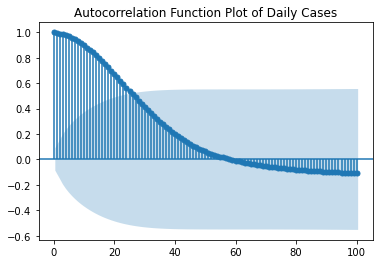

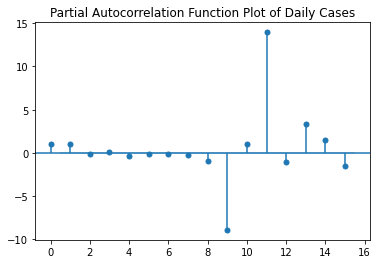

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(daily.DailyCases,title="Autocorrelation Function Plot of Daily Cases",lags=100)

pacf_plot = plot_pacf(daily.DailyCases,title="Partial Autocorrelation Function Plot of Daily Cases",lags=15)

### Old :Based on PACF Graph it looks like the lags 1,2,7,8,9,11,13,19 are good places to start for Auto Regressive model.
### 6 June : Based on PACF Graph it looks like the lags 9,11,13,25 are good places to start for Auto Regressive model.

### The auto correlation function(ACF) graph is decaying over time, which suggest an auto regressive process inherently. If it would have shut off immediately after some lags, it would have been close to a moving average model

In [ ]:
from pandas.plotting import autocorrelation_plot  
x = autocorrelation_plot(daily_train)
   
plt.style.use('seaborn')
plt.figure(figsize=(12,8))
# ploting the Curve
x.plot()
plt.show()

Lag Value for  
    daily : 50  
    train : 100  
    test : 30
    

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
def acf_pacf_plots(dataset):
#     ts_diff = dataset - dataset.shift()
#     ts_diff.dropna(inplace=True)
    acf_result = acf(dataset,nlags=60)
    pacf_result = pacf(dataset,nlags=10, method='ols')
    
    # ACF
    plt.figure(figsize=(22,10))
    plt.style.use('seaborn')
    plt.subplot(121) 
    plt.plot(acf_result)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.title('Autocorrelation Function')
    
#     PACF
    plt.subplot(122)
    plt.style.use('seaborn')
    plt.plot(pacf_result)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel("Lags")
    plt.ylabel("Partial Autocorrelation")
    plt.tight_layout()

In [ ]:
acf_pacf_plots(daily)

In [ ]:
# pip install --user pmdarima

In [ ]:
# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(daily_train, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 0, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 

#Worth Knowing : How to index dataframe whose index is datetime
from datetime import timedelta
a = datetime(2021,1,15)
b = datetime(2021,2,15)

dummy = daily[:a]
dummy2 = daily[a+timedelta(days=1):b]
#It Works!

### Auto Regressive Only Model

In [21]:
from statsmodels.tsa.arima.model import ARIMA
from time import time
#stas..tsa.arima_model > Depreceated
#ARMA Model also deprecated. Hence using ARIMA

### Creating the AR Model  
>Only using AR parameter i.e. p = 11 retreived from PACF Plot(direct lag autocorrelation)

In [35]:
ar_model=ARIMA(daily_train.DailyCases, order=(50,0,0))
#Warnings dissappeared after applying inferred frequency function

Fitting the created model to our dataset. We actually apply the model to the data now


In [36]:
start =time()
ar_model_fit=ar_model.fit()
end = time()
print("Model Fitting Time : ", end-start," s")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Fitting Time :  38.46311616897583  s


In [37]:
#Summary of the model
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             DailyCases   No. Observations:                  398
Model:                ARIMA(50, 0, 0)   Log Likelihood               -3765.170
Date:                Sat, 05 Jun 2021   AIC                           7634.340
Time:                        09:17:19   BIC                           7841.636
Sample:                    01-22-2020   HQIC                          7716.448
                         - 02-22-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.768e+04   1.71e+04      1.619      0.105   -5819.898    6.12e+04
ar.L1          0.3276      0.050      6.524      0.000       0.229       0.426
ar.L2          0.2084      0.049      4.213      0.0

### ARIMA(11,0,0) : Lags : 1,2,3,6,7,9,11 : For which p value is 0.00

In [ ]:
#get prediction start and end dates
arPredStart = daily_test.index[0]
arPredEnd = daily_test.index[-1]

In [ ]:
#Get the predictions and residuals
ar_pred = ar_model_fit.predict(start=arPredStart,end=arPredEnd)
ar_residuals = daily_test - ar_pred

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(ar_pred,color='b')
plt.plot(daily_train,color='r')
plt.plot(daily_test,color='g')
# plt.title("Residuals from AR Model ",fontsize=20)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)

In [ ]:
ar_pred.plot()
daily_test.plot()

# ------KEEP MOVING FORWARD!!-------